In [79]:
import pandas as pd
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import re
import spacy
import string
import altair as alt
from IPython.display import display

nltk.download('vader_lexicon')  # Download the VADER lexicon
analyzer = SentimentIntensityAnalyzer()
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\KevinRomero\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KevinRomero\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KevinRomero\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Importación de Datos

En la fase inicial de nuestro proyecto, realizamos la importación de la base de datos que almacena los tickets de soporte presentadas por nuestros clientes. La información recopilada incluye detalles cruciales como el ID del issue, el título del incidente, la fecha de creación, su estado actual, el nombre del cliente, entre otros atributos relevantes. En este contexto, nuestro análisis de texto se centrará específicamente en la columna de títulos, que refleja el texto introducido al crear un ticket de soporte.

El propósito fundamental de este análisis es explorar las potenciales perspectivas e información que podemos inferir a través de los títulos utilizando diversas herramientas de análisis de texto. Este enfoque nos permitirá obtener una comprensión más profunda de los temas recurrentes, las tendencias emergentes y posiblemente identificar patrones que puedan contribuir a una mejor gestión y resolución de problemas en el servicio de soporte al cliente.


Al integrar estas herramientas en nuestro análisis, buscamos maximizar la utilidad de la información extraída de los títulos, permitiéndonos tomar decisiones informadas y mejorar la eficiencia en la resolución de problemas de soporte al cliente.

In [80]:
#Import Tickets Database
df = pd.read_csv("C:/Users/KevinRomero/OneDrive - CIPPlanner Corporation/Desktop/text analisis Tickets/Support Ticket Customer Unresponsive Days_2012_10.31.23.csv", encoding='latin-1',header=0)

# Replace spaces with underscores in column names
df.columns = df.columns.str.replace(' ', '_')

df = df.drop(columns=['IssueAutoID','AutoCloseFor7Days','Customer_Unresponsive_Days','Status_Date','Customer_Comment_Date','SysDate','URL',"CIP_Respond_By_Date",'Client_Module','CIPPlanner(Days)','Client(Days)'])

df.head(5)

,IssueID,Title,Created_By,Created_On,Issue_Ownership,Support_Status,Customer
0,CI_000532,Add Run Date Field to Workflow Log Report & CL...,Harry Tan,01/01/2012 16:42:34,CIPPlanner,Closed,FDXG - FedEx Ground Package System Inc
1,CI_000533,"Scenario list on ""copy projects"" screen is not...",Buddy Liang,01/06/2012 00:39:37,CIPPlanner,Closed,HND - Hernando County Florida
2,CI_000535,Arithmetic overflow error converting money to ...,Sweet He,02/02/2012 00:24:42,CIPPlanner,Closed,SFO-CPS - SFO-CPS (Budget Office)
3,CI_000536,Fail to update Fund Revenue Template when sub-...,Scarlett Zhong,02/07/2012 23:08:39,CIPPlanner,Closed,TTD - Tahoe Transportation District
4,CI_000537,Fail to Delete Batch,Sweet He,02/08/2012 17:51:36,CIPPlanner,Closed,SFO-CPS - SFO-CPS (Budget Office)


# Limpieza de la columna de Titulos

Dado que nuestro enfoque para este analisis de los titulos de los tickets de soporte, empezamos por limpiar esta columna. Empezamos por reover los signos y punctuaciones. 

---

# Limpieza de la Columna de Títulos

Empezamos nuestro análisis centrado en los títulos de los tickets de soporte, abordamos la limpieza de la columna correspondiente. Este proceso es esencial para garantizar que los datos estén en un formato óptimo y libre de elementos superfluos que puedan interferir con nuestro análisis.



**Eliminación de Signos y Puntuaciones:** Comenzamos por eliminar signos de puntuación y caracteres especiales de los títulos.

**Normalización de Texto:** Aplicamos técnicas de normalización para asegurar que el texto esté en un formato consistente, como la conversión de todas las letras a minúsculas. Esto garantiza coherencia y evita posibles inconsistencias debido a variaciones en la capitalización.


Este enfoque meticuloso en la limpieza de datos contribuirá a resultados más precisos y significativos en nuestra exploración de los temas y patrones presentes en los títulos de los tickets de soporte.

In [81]:


#library that contains punctuation

signos_puntuacion = string.punctuation
signos_puntuacion = signos_puntuacion.replace("#", "")
signos_puntuacion

#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in signos_puntuacion])
    return punctuationfree

#storing the puntuation free text
df['claned_title'] = df['Title'].apply(lambda x:remove_punctuation(x))

# change titles to lowercase
df['claned_title'] = df['claned_title'].apply((lambda x: x.lower()))
df.head(5)



,IssueID,Title,Created_By,Created_On,Issue_Ownership,Support_Status,Customer,claned_title
0,CI_000532,Add Run Date Field to Workflow Log Report & CL...,Harry Tan,01/01/2012 16:42:34,CIPPlanner,Closed,FDXG - FedEx Ground Package System Inc,add run date field to workflow log report cle...
1,CI_000533,"Scenario list on ""copy projects"" screen is not...",Buddy Liang,01/06/2012 00:39:37,CIPPlanner,Closed,HND - Hernando County Florida,scenario list on copy projects screen is not c...
2,CI_000535,Arithmetic overflow error converting money to ...,Sweet He,02/02/2012 00:24:42,CIPPlanner,Closed,SFO-CPS - SFO-CPS (Budget Office),arithmetic overflow error converting money to ...
3,CI_000536,Fail to update Fund Revenue Template when sub-...,Scarlett Zhong,02/07/2012 23:08:39,CIPPlanner,Closed,TTD - Tahoe Transportation District,fail to update fund revenue template when subn...
4,CI_000537,Fail to Delete Batch,Sweet He,02/08/2012 17:51:36,CIPPlanner,Closed,SFO-CPS - SFO-CPS (Budget Office),fail to delete batch


# Aplicación de Análisis de Sentimiento

En esta etapa de nuestro análisis, hemos aplicado técnicas de análisis de sentimiento a la columna de títulos que previamente hemos limpiado. Esta fase tiene como objetivo proporcionar insights valiosos sobre la carga emocional asociada con los problemas presentados en los tickets de soporte.



**'sentiment_scores':** Esta nueva columna detalla los resultados específicos del análisis de sentimiento para cada título. Proporciona información desglosada sobre los aspectos negativos, neutrales y positivos del sentimiento asociado con cada título.

**'compound_score':** Esta columna ofrece un resumen de los resultados del análisis de sentimiento. El puntaje compuesto refleja la intensidad y dirección del sentimiento general en cada título, permitiéndonos discernir rápidamente la tendencia emocional predominante.

**'sentiment':** Para una comprensión más accesible, hemos introducido la columna 'sentiment', que clasifica cada título en categorías de sentimiento: negativo, neutral o positivo. Esto facilita la identificación rápida de la naturaleza emocional de cada problema presentado.

La aplicación de análisis de sentimiento agrega una capa adicional de perspicacia a nuestro estudio, permitiéndonos evaluar no solo la frecuencia de los problemas, sino también la reacción emocional asociada con cada uno. 

In [82]:
# Function to apply sentiment analysis
def analyze_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores

# Apply sentiment analysis to the 'text_column' and store the results in a new column
df['sentiment_scores'] = df['claned_title'].apply(analyze_sentiment)

# Extract compound scores as a measure of overall sentiment
df['compound_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])

# Function to categorize values
def categorize_value(value):
    if value > 0:
        return 'positive'
    elif value < 0:
        return 'negative'
    else:
        return 'neutral'

# Applying the function to create a new column
df['sentiment'] = df['compound_score'].apply(categorize_value)


# Display the DataFrame
df.head()

,IssueID,Title,Created_By,Created_On,Issue_Ownership,Support_Status,Customer,claned_title,sentiment_scores,compound_score,sentiment
0,CI_000532,Add Run Date Field to Workflow Log Report & CL...,Harry Tan,01/01/2012 16:42:34,CIPPlanner,Closed,FDXG - FedEx Ground Package System Inc,add run date field to workflow log report cle...,"{'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'comp...",0.6908,positive
1,CI_000533,"Scenario list on ""copy projects"" screen is not...",Buddy Liang,01/06/2012 00:39:37,CIPPlanner,Closed,HND - Hernando County Florida,scenario list on copy projects screen is not c...,"{'neg': 0.156, 'neu': 0.844, 'pos': 0.0, 'comp...",-0.2584,negative
2,CI_000535,Arithmetic overflow error converting money to ...,Sweet He,02/02/2012 00:24:42,CIPPlanner,Closed,SFO-CPS - SFO-CPS (Budget Office),arithmetic overflow error converting money to ...,"{'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'comp...",-0.4019,negative
3,CI_000536,Fail to update Fund Revenue Template when sub-...,Scarlett Zhong,02/07/2012 23:08:39,CIPPlanner,Closed,TTD - Tahoe Transportation District,fail to update fund revenue template when subn...,"{'neg': 0.28, 'neu': 0.72, 'pos': 0.0, 'compou...",-0.5423,negative
4,CI_000537,Fail to Delete Batch,Sweet He,02/08/2012 17:51:36,CIPPlanner,Closed,SFO-CPS - SFO-CPS (Budget Office),fail to delete batch,"{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'comp...",-0.5423,negative




Para representar de manera efectiva los resultados de nuestro análisis de sentimiento, hemos creado la siguiente gráfica de barras, la cual resume las proporciones de los resultados en la columna "sentiment". Este enfoque visual nos brinda una comprensión rápida y clara de la naturaleza emocional de los títulos de los tickets de soporte.



- **Neutral (64%):** La categoría neutral domina, representando el 64% de los resultados. Esta observación sugiere que la mayoría de los clientes utiliza un lenguaje moderado al describir sus problemas, indicando posiblemente situaciones rutinarias o menos urgentes.

- **Negativo (13%):** La presencia de un 13% de títulos con etiquetas negativas indica que un segmento significativo de los clientes expresa problemas con un tono crítico o urgente. Estos casos podrían requerir una atención más inmediata y un enfoque especializado.

- **Positivo (22%):** Alrededor del 22% de los resultados exhiben un lenguaje positivo, lo que sugiere que algunos clientes expresan sus problemas de manera optimista. Estos casos podrían estar relacionados con comentarios positivos o consultas menos críticas.

Esta visualización proporciona una visión panorámica de la distribución emocional en los títulos de los tickets de soporte. La interpretación de estos resultados nos brinda una base sólida para ajustar estrategias de atención al cliente y asignar recursos de manera más efectiva en función de la urgencia y naturaleza emocional de los problemas presentados por los clientes.

In [83]:
# Count the occurrences of each category
category_counts = df['sentiment'].value_counts().reset_index()

# Renaming columns for clarity
category_counts.columns = ['sentiment', 'count']

# Calculate total count
total_count = category_counts['count'].sum()

# Calculate percentages
category_counts['percentage'] = (category_counts['count'] / total_count) * 100

# Create a bar chart with percentage labels
bar_chart = alt.Chart(category_counts).mark_bar().encode(
    x='sentiment:N',
    y='percentage:Q',
    color='sentiment:N',
    tooltip=['sentiment:N', 'percentage:Q'],
)

# Add percentage labels to the bars
text = bar_chart.mark_text(align='center', baseline='bottom', dy=-5).encode(
    text='percentage:Q'
)

# Display the chart with percentage labels
display(bar_chart + text)


c:\Users\KevinRomero\anaconda3\Lib\site-packages\altair\utils\core.py:197: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.LayerChart(...)

# Análisis Extendido del Sentimiento por Cliente

Para proporcionar una visión más detallada del sentimiento expresado por cada cliente, hemos creado la siguiente gráfica de barras que presenta el promedio del valor ponderado de los resultados de sentimiento para cada cliente. Este enfoque nos permite identificar de manera clara y rápida las tendencias generales en la percepción de los clientes sobre la calidad del servicio y la resolución de problemas.



- **Clientes con Títulos Positivos (Ejemplos):**
  - YREFY
  - FedEx
  - City of Fremont

Estos clientes destacan por tener títulos de tickets que, en promedio, expresan sentimientos positivos. 

- **Clientes con Títulos Negativos (Ejemplos):**
  - Elsinore Valley Municipal Water District
  - City of Aspen and Pitkin County Colorado
  - Hernando County Florida

Por otro lado, estos clientes muestran, en promedio, títulos de tickets con sentimientos más negativos. Este resultado puede requerir una atención especial para abordar las preocupaciones de estos clientes y mejorar su experiencia general.

Este análisis más detallado por cliente nos permite no solo comprender las tendencias generales de sentimiento, sino también identificar clientes específicos que podrían requerir una atención más focalizada. 

In [84]:
# Create a new DataFrame with unique customers
customers = df['Customer'].drop_duplicates().reset_index(drop=True)

# If you want to create a DataFrame with a column named 'unique_customers'
customers = pd.DataFrame({'Customer': df['Customer'].unique()})

# Use merge to combine the dataframes based on the 'City' column
merged_df = customers.merge(df, on='Customer', how='left')

# Use groupby and mean to get the average score for each city
city_avg_score = merged_df.groupby('Customer')['compound_score'].mean().reset_index(name='AvgScore')

# Merge the city_avg_score dataframe back into the original dataframe
df1 = customers.merge(city_avg_score, on='Customer', how='left')

# If there are cities that didn't appear in df2, fill NaN values with 0
#df1['AvgScore'] = df1['AvgScore'].fillna(0)

# Create a bar graph using Altair
chart = alt.Chart(df1).mark_bar().encode(
    x='Customer',
    y='AvgScore'
)

# Display the chart
display(chart)

c:\Users\KevinRomero\anaconda3\Lib\site-packages\altair\utils\core.py:197: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

# Lematización y Eliminación de Stopwords en Títulos

En la siguiente fase de nuestro análisis, implementamos el algoritmo de lematización en los títulos que previamente hemos limpiado. La lematización es un proceso lingüístico que busca reducir las palabras a su forma base, lo que facilita la identificación de términos clave y la comprensión del contenido semántico.asi mismo La lematización ayuda a mantener la consistencia al tratar las palabras de manera uniforme, independientemente de su forma gramatical.

Posteriormente, aplicamos la eliminación de stopwords a los títulos. Las stopwords son palabras comunes que generalmente no aportan un valor informativo significativo y, por lo tanto, se pueden eliminar para centrarse en términos más relevantes.asi mismo, la eliminación de stopwords reduce el ruido en los datos, permitiendo una identificación más clara de patrones y temas importantes.

Al integrar la lematización y la eliminación de stopwords en nuestro análisis, buscamos optimizar la calidad de los datos textuales y facilitar la identificación de patrones clave en los títulos de los tickets de soporte.

In [85]:
# Define a function to lemmatize the text in your DataFrame:

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

# Apply the lemmatize_text function to the 'text_column' and store the results in a new column
df['lemmatized_text'] = df['claned_title'].apply(lemmatize_text)

# Define a function that removes stop words from a given text:
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    words = text.split()
    filtered_text = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_text)

# Apply the remove_stopwords function to the text column in your DataFrame to create a new column with stop words removed:
df['text_without_stopwords'] = df['lemmatized_text'].apply(remove_stopwords)

# Display the DataFrame
df.head()



,IssueID,Title,Created_By,Created_On,Issue_Ownership,Support_Status,Customer,claned_title,sentiment_scores,compound_score,sentiment,lemmatized_text,text_without_stopwords
0,CI_000532,Add Run Date Field to Workflow Log Report & CL...,Harry Tan,01/01/2012 16:42:34,CIPPlanner,Closed,FDXG - FedEx Ground Package System Inc,add run date field to workflow log report cle...,"{'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'comp...",0.6908,positive,add run date field to workflow log report clea...,add run date field workflow log report clear a...
1,CI_000533,"Scenario list on ""copy projects"" screen is not...",Buddy Liang,01/06/2012 00:39:37,CIPPlanner,Closed,HND - Hernando County Florida,scenario list on copy projects screen is not c...,"{'neg': 0.156, 'neu': 0.844, 'pos': 0.0, 'comp...",-0.2584,negative,scenario list on copy project screen is not co...,scenario list copy project screen controlled s...
2,CI_000535,Arithmetic overflow error converting money to ...,Sweet He,02/02/2012 00:24:42,CIPPlanner,Closed,SFO-CPS - SFO-CPS (Budget Office),arithmetic overflow error converting money to ...,"{'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'comp...",-0.4019,negative,arithmetic overflow error converting money to ...,arithmetic overflow error converting money dat...
3,CI_000536,Fail to update Fund Revenue Template when sub-...,Scarlett Zhong,02/07/2012 23:08:39,CIPPlanner,Closed,TTD - Tahoe Transportation District,fail to update fund revenue template when subn...,"{'neg': 0.28, 'neu': 0.72, 'pos': 0.0, 'compou...",-0.5423,negative,fail to update fund revenue template when subn...,fail update fund revenue template subnode added
4,CI_000537,Fail to Delete Batch,Sweet He,02/08/2012 17:51:36,CIPPlanner,Closed,SFO-CPS - SFO-CPS (Budget Office),fail to delete batch,"{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'comp...",-0.5423,negative,fail to delete batch,fail delete batch


# Wordcloud de Palabras Más Frecuentes en Títulos

Tras realizar una limpieza más profunda de los títulos mediante lematización y eliminación de stopwords, hemos creado una visualización con el Wordcloud de las palabras más frecuentes. Esta representación gráfica nos ofrece una instantánea visual de las palabras clave que dominan en los títulos de los tickets de soporte.


La visualización permite identificar de manera inmediata las palabras que aparecen con mayor frecuencia, revelando las tendencias y temas dominantes en los títulos.Al resaltar las palabras más frecuentes, nos centramos en términos clave que podrían proporcionar información valiosa sobre los problemas más recurrentes o críticos.


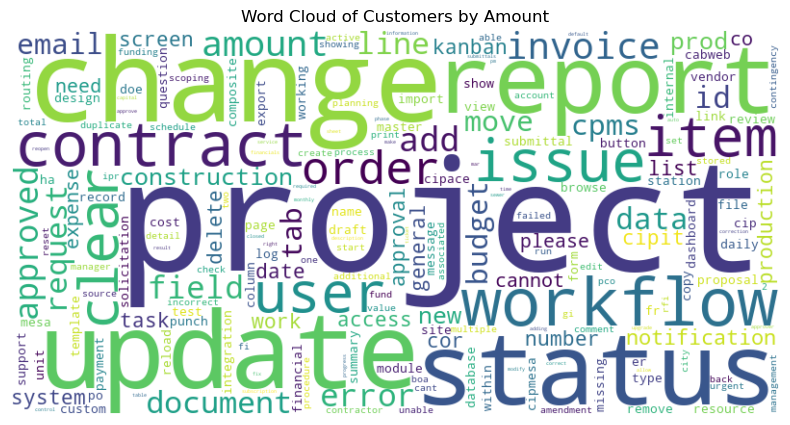

In [86]:
def calculate_word_frequencies(text_column):
    # Combine all the text in the column into one string
    combined_text = " ".join(text_column)

    # Tokenize the text into words (you can use more sophisticated tokenization if needed)
    words = re.findall(r'\w+', combined_text.lower())

    # Calculate word frequencies using Counter
    word_frequencies = Counter(words)

    return word_frequencies

# Apply the calculate_word_frequencies function to the 'text_column'
word_freq = calculate_word_frequencies(df['text_without_stopwords'])

# Create a DataFrame to display the word frequencies
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

# Create a dictionary mapping customers to their total amounts
customer_amount_dict = dict(zip(word_freq_df['Word'], word_freq_df['Frequency']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(customer_amount_dict)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Customers by Amount')
plt.show()

# Gráfica de Barras de Palabras Más Utilizadas en Títulos

Para una comprensión más detallada de las palabras más frecuentemente utilizadas en los títulos de los tickets de soporte, hemos generado una gráfica de barras ordenada de mayor a menor frecuencia. Esta visualización nos proporciona una visión clara de las palabras clave que dominan en el conjunto de datos analizado.

**Resumen de la Gráfica de Barras:**

1. **"Project"**
2. **"Change"**
3. **"Update"**
4. **"Status"**
5. **"Report"**
6. **"Workflow"**
7. **"Contract**
8. **Issue"**
9. **User**
10. **Item**

 La visualización ordenada revela las palabras más comunes, permitiéndonos identificar rápidamente los temas dominantes en los títulos de los tickets de soporte. Al destacar las palabras más utilizadas, podemos enfocar nuestros esfuerzos en áreas específicas que pueden requerir mayor atención o resolución.



In [87]:

# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).head(20)


# Create a bar chart using Altair
chart = alt.Chart(word_freq_df).mark_bar().encode(
    x='Frequency:Q',
    y=alt.Y('Word:O', sort='-x'),
    tooltip=['Word', 'Frequency']
).properties(
    title='Top 20 Words by Frecuancy'
)

# Display the chart
display(chart)

c:\Users\KevinRomero\anaconda3\Lib\site-packages\altair\utils\core.py:197: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

# Extracción de Noun Chunks en Títulos

En el último paso de nuestro análisis, hemos aplicado la extracción de noun chunks a los títulos de los tickets de soporte. Los noun chunks son frases sustantivas que nos permiten identificar de manera más específica y detallada las entidades o conceptos clave en el texto.


Al extraer los noun chunks, podemos identificar conceptos específicos o entidades que son fundamentales para comprender el contenido semántico de los títulos. 

Los Noun Chunks más comunes:
1. **"Move Amount"**
2. **"Internal Item"**
3. **"Line Item"**
4. **"Punch List"**
5. **"Same Project"**
6. **"Change Order"**
7. **"Construction Daily Report"**
8. **"CPMS Prod"**
9. **"General Document"**
10. **"Task Order"**

Estos noun chunks más comunes ofrecen una visión específica de los temas recurrentes o conceptos clave en los títulos de los tickets de soporte. Esta información puede ser crucial para adaptar estrategias de atención al cliente, priorizar áreas específicas de mejora y proporcionar soluciones más efectivas a los problemas presentados por los clientes.



In [88]:
# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Function to extract multi-word noun chunks
def extract_multi_word_noun_chunks(text):
    doc = nlp(text)
    multi_word_chunks = [chunk.text for chunk in doc.noun_chunks if len(chunk.text.split()) > 1]
    return multi_word_chunks



# Apply the extract_multi_word_noun_chunks function to the 'text_column'
df['multi_word_noun_chunks'] = df['lemmatized_text'].apply(extract_multi_word_noun_chunks)

# Flatten the list of noun chunks into a single list
all_multi_word_chunks = [chunk for chunks in df['multi_word_noun_chunks'] for chunk in chunks]

# Calculate the frequency of multi-word noun chunks using Counter
multi_word_chunk_frequencies = Counter(all_multi_word_chunks)

# Create a DataFrame to display the multi-word noun chunk frequencies
multi_word_chunk_freq_df = pd.DataFrame(list(multi_word_chunk_frequencies.items()), columns=['Multi-Word Noun Chunk', 'Frequency'])

# Sort the DataFrame by frequency in descending order
multi_word_chunk_freq_df = multi_word_chunk_freq_df.sort_values(by='Frequency', ascending=False).head(20)

# Display the sorted DataFrame
#print(multi_word_chunk_freq_df)

# Create a bar chart using Altair
chart = alt.Chart(multi_word_chunk_freq_df).mark_bar().encode(
    x='Frequency:Q',
    y=alt.Y('Multi-Word Noun Chunk:O', sort='-x'),
    tooltip=['Multi-Word Noun Chunk', 'Frequency']
).properties(
    title='Top 20 Noun Chunks'
)

# Display the chart
display(chart)


c:\Users\KevinRomero\anaconda3\Lib\site-packages\altair\utils\core.py:197: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)